## Import

In [35]:
import numpy as np
import pandas as pd
import seaborn as sb;

import matplotlib.pyplot as plt
from matplotlib import rcParams

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets

import sklearn.metrics as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_moons

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 7, 4

## Load Iris Dataset

In [3]:
iris = datasets.load_iris()
print (iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
df = pd.DataFrame(data= np.c_[iris.data, iris.target], columns= iris.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

## Building and Running K-Mean Model
The k-means problem is solved using either Lloyd’s or Elkan’s algorithm.

KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)
- n_clusters: The number of clusters to form as well as the number of centroids to generate.
- init: Method for initialization.
- n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
- max_iter: Maximum number of iterations of the k-means algorithm for a single run.
- tol: Relative tolerance with regards to inertia to declare convergence.

In [6]:
clustering = KMeans(n_clusters = 3, random_state = 5)
clustering.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [7]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
# Sum of squared distances of samples to their closest cluster center.
clustering.inertia_

78.85144142614601

## Plotting your model outputs

In [10]:
# Data
iris_data_df = pd.DataFrame(iris.data)
iris_data_df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Target
iris_target_df = pd.DataFrame(iris.target)
iris_target_df = columns = ['Targets']

Text(0.5,1,'K-Measn Classification')

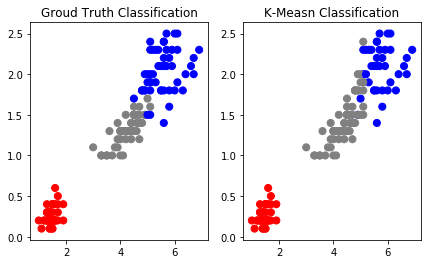

In [33]:
color_theme = np.array(['red','grey','blue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_data_df['Petal Length'], y=iris_data_df['Petal Width'], c=color_theme[iris.target], s=50)
plt.title('Groud Truth Classification')

relabel = np.choose(clustering.labels_,[1,0,2]).astype(np.int64) # [0,1,3]->[1,0,2]

plt.subplot(1,2,2)
plt.scatter(x=iris_data_df['Petal Length'], y=iris_data_df['Petal Width'], c=color_theme[relabel], s=50)
plt.title('K-Measn Classification')

## How to determine the optimal number for K

In [12]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(iris.data)
    Sum_of_squared_distances.append(km.inertia_)

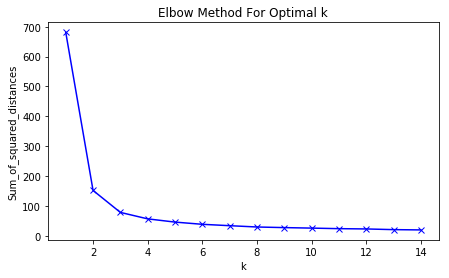

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Evaluate the accuracy of a classification

In [14]:
accuracy_score(iris.target,relabel)

0.8933333333333333

In [34]:
# Text summary of the precision, recall, F1 score for each class. 
print (classification_report(iris.target,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

   micro avg       0.89      0.89      0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



- Precision Score: accuracy of positive predictions:
    TP/(TP + FP)

- Recall Score (aka sensitivity or true positive rate): fraction of positives That were correctly identified:
    TP/(TP + FN)

- F1 Score: takes into account precision and the recall. It is created by finding the the harmonic mean of precision and recall.
    2 x (precision x recall)/(precision + recall)
    
F1 Score is a helpful metric for comparing two classifiers. 
    

In [42]:
precision_score( iris.target, relabel, average=None )

array([1.        , 0.77419355, 0.94736842])

In [44]:
recall_score( iris.target, relabel, average=None  )

array([1.  , 0.96, 0.72])

In [45]:
f1_score( iris.target, relabel, average=None  )

array([1.        , 0.85714286, 0.81818182])

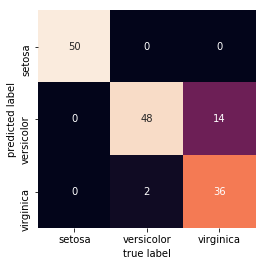

In [16]:
iris_cm = confusion_matrix(iris.target,relabel)
sb.heatmap(iris_cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Generate Sample Data

Generate isotropic Gaussian blobs for clustering.

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

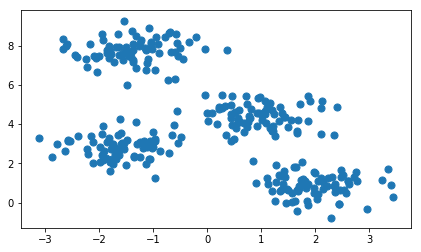

In [17]:
sample_data, sample_target = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(sample_data[:, 0], sample_data[:, 1], s=50);

In [18]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(sample_data)
    Sum_of_squared_distances.append(km.inertia_)

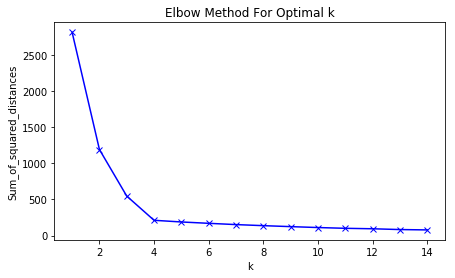

In [19]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### K=3

In [20]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(sample_data)
predicted3 = kmeans3.predict(sample_data)

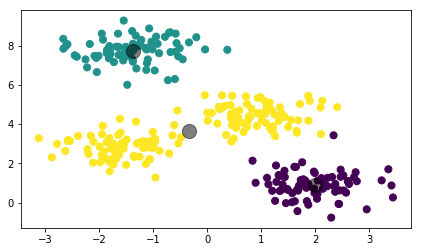

In [21]:
plt.scatter(sample_data[:, 0], sample_data[:, 1], c=predicted3, s=50, cmap='viridis')

centers3 = kmeans3.cluster_centers_
plt.scatter(centers3[:, 0], centers3[:, 1], c='black', s=200, alpha=0.5);

### K=4

In [22]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(sample_data)
predicted4 = kmeans4.predict(sample_data)

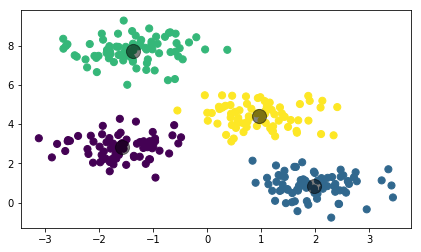

In [23]:
plt.scatter(sample_data[:, 0], sample_data[:, 1], c=predicted4, s=50, cmap='viridis')

centers4 = kmeans4.cluster_centers_
plt.scatter(centers4[:, 0], centers4[:, 1], c='black', s=200, alpha=0.5);

## Complicated Geometry Boundary

Make two interleaving half circles

make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)

In [24]:
moon_data, moon_target = make_moons(200, noise=.05, random_state=0)

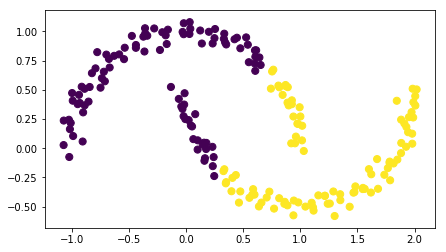

In [25]:
labels = KMeans(2, random_state=0).fit_predict(moon_data)
plt.scatter(moon_data[:, 0], moon_data[:, 1], c=labels, s=50, cmap='viridis');

In [26]:
accuracy_score(moon_target,labels)

0.755

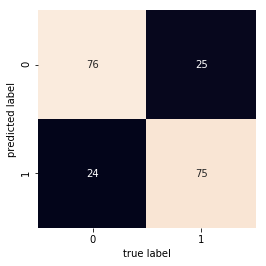

In [27]:
moon_cm = confusion_matrix(moon_target,labels)
sb.heatmap(moon_cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [28]:
print (classification_report(moon_target,labels))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       100
           1       0.76      0.75      0.75       100

   micro avg       0.76      0.76      0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200

